# Homework 6
## Jiaqi Wu (USCID: 2947873567)
### 1. Supervised, Semi-Supervised, and Unsupervised Learning  
#### (b) Monte-Carlo Simulation: Repeat the following procedures for supervised, unsupervised, and semi-supervised learning M = 30 times, and use randomly selected train and test data (make sure you use 20% of both the positve and negative classes as the test set). Then compare the average scores (accuracy, precision, recall, F1-score, and AUC) that you obtain from each algorithm.

In [1]:
import pandas as pd
data_path = '../data/wdbc.data'
names = ['ID','class']
for i in range(1,31):
    names.append(str(i))
wdbc_data = pd.read_csv(data_path, header=None, names = names)

In [2]:
wdbc_data

,ID,class,1,2,3,4,5,6,7,8,...,21,22,23,24,25,26,27,28,29,30
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
wdbc_X = wdbc_data.iloc[:,2:]
wdbc_y = wdbc_data.iloc[:,1]

In [4]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(wdbc_y)
le.classes_

array(['B', 'M'], dtype=object)

In [5]:
wdbc_y_b = le.transform(wdbc_y)

##### i. Supervised Learning  
Train an L1-penalized SVM to classify the data. Use 5 fold cross validation to choose the penalty parameter. Use normalized data. Report the average accuracy, precision, recall, F1-score, and AUC, for both training and test sets over your M runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs.

In [6]:
from sklearn.preprocessing import normalize, MinMaxScaler
from sklearn.model_selection import train_test_split
#wdbc_X = normalize(wdbc_X, axis = 0)
X_train, X_test, y_train, y_test = train_test_split(wdbc_X, wdbc_y_b, test_size=0.2, random_state=42, stratify = wdbc_y)
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
def linearSVC_param_search(X, y):
    C_range = np.logspace(-3, 6, 10)
    max_score = 0
    final_C = 1
    for C in C_range:
        svc_clf = LinearSVC(penalty="l1", C = C, loss="squared_hinge", max_iter = 10000, dual=False, tol=1e-3)
        score =  np.mean(cross_val_score(svc_clf, X, y, cv=5, scoring = 'accuracy'))
        if score > max_score:
            max_score = score
            final_C = C            
    return {'C':final_C, 'accuracy':max_score}

In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
def report_linearSVC(train_X, train_y, test_X, test_y, svc_clf, plot = True):
    pred_train = svc_clf.predict(train_X)
    pred_test = svc_clf.predict(test_X)
    accuracy_train = accuracy_score(train_y, pred_train)
    precision_train = precision_score(train_y, pred_train)
    recall_train = recall_score(train_y, pred_train)
    f1_train = f1_score(train_y, pred_train)
    fpr, tpr, thresholds = roc_curve(train_y, pred_train)
    roc_auc_train = auc(fpr, tpr)
    confusion_matrix_train = confusion_matrix(train_y, pred_train)
    train_report = {
        'accuracy':accuracy_train,
        'precision':precision_train,
        'recall':recall_train,
        'f1':f1_train,
        'auc':roc_auc_train
    }
    if plot == True:
        print('Train:')
        print(train_report)
        print(confusion_matrix_train)
    if plot == True:
        plt.figure()
        lw = 2
        plt.plot(fpr, tpr, lw=lw)
        plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('FPR')
        plt.ylabel('TPR')
        plt.title('ROC and AUC')
        plt.show()
    
    accuracy_test = accuracy_score(test_y, pred_test)
    precision_test = precision_score(test_y, pred_test)
    recall_test = recall_score(test_y, pred_test)
    f1_test = f1_score(test_y, pred_test)
    fpr, tpr, thresholds = roc_curve(test_y, pred_test)
    roc_auc_test = auc(fpr, tpr)
    confusion_matrix_test = confusion_matrix(test_y, pred_test)
    test_report = {
        'accuracy':accuracy_test,
        'precision':precision_test,
        'recall':recall_test,
        'f1':f1_test,
        'auc':roc_auc_test
    }
    if plot == True:
        print('Test:')
        print(test_report)
        print(confusion_matrix_test)
    if plot == True:
        plt.figure()
        lw = 2
        plt.plot(fpr, tpr, lw=lw)
        plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('FPR')
        plt.ylabel('TPR')
        plt.title('ROC and AUC')
        plt.show()
    return train_report, test_report

In [11]:
linearSVC_param_search(X_train, y_train)

{'C': 1.0, 'accuracy': 0.9670329670329672}

Train:
{'accuracy': 0.9846153846153847, 'precision': 0.9880239520958084, 'recall': 0.9705882352941176, 'f1': 0.9792284866468843, 'auc': 0.9817853457172343}
[[283   2]
 [  5 165]]


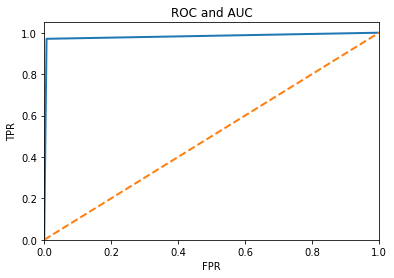

Test:
{'accuracy': 0.9736842105263158, 'precision': 0.975609756097561, 'recall': 0.9523809523809523, 'f1': 0.963855421686747, 'auc': 0.9692460317460317}
[[71  1]
 [ 2 40]]


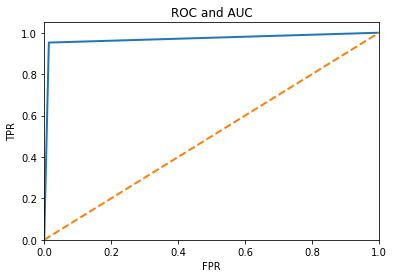

In [12]:
clf = LinearSVC(penalty="l1", C = 1, loss="squared_hinge", max_iter = 10000, dual=False, tol=1e-3).fit(X_train,y_train)
train_report, test_report = report_linearSVC(X_train, y_train, X_test, y_test, clf)

* Monte-Carlo Simulation

In [13]:
supervised_train = {}
supervised_test = {}
for i in range(30):
    X_train, X_test, y_train, y_test = train_test_split(wdbc_X, wdbc_y_b, test_size=0.2, random_state=i, stratify = wdbc_y)
    scaler = MinMaxScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    C = linearSVC_param_search(X_train, y_train)['C']
    clf = LinearSVC(penalty="l1", C = C, loss="squared_hinge", max_iter = 10000, dual=False, tol=1e-3).fit(X_train,y_train)
    train_report, test_report = report_linearSVC(X_train, y_train, X_test, y_test, clf, plot='False')
    for key in train_report.keys():
        if key not in supervised_train.keys():
            supervised_train[key] = []
        supervised_train[key].append(train_report[key])
    for key in test_report.keys():
        if key not in supervised_test.keys():
            supervised_test[key] = []
        supervised_test[key].append(test_report[key])

In [14]:
supervised_train_result = {}
supervised_test_result = {}
for key in supervised_train.keys():
    supervised_train_result[key] = np.mean(supervised_train[key])
for key in supervised_test.keys():
    supervised_test_result[key] = np.mean(supervised_test[key])
print('Train:', supervised_train_result)
print('Test:', supervised_test_result)

Train: {'accuracy': 0.9857875457875458, 'precision': 0.9902250000811127, 'recall': 0.9715686274509803, 'f1': 0.9807866166125633, 'auc': 0.9829188166494668}
Test: {'accuracy': 0.963157894736842, 'precision': 0.9697885541014775, 'recall': 0.9293650793650791, 'f1': 0.9487592060570555, 'auc': 0.9561177248677247}


##### ii. Semi-Supervised Learning/ Self-training
Select 50% of the positive class along with 50% of the negative class in the training set as labeled data and the rest as unlabelled data. You can select them randomly.  
*  A. Train an L1-penalized SVM to classify the labeled data Use normalized data. Choose the penalty parameter using 5 fold cross validation

In [15]:
X_train, X_test, y_train, y_test = train_test_split(wdbc_X, wdbc_y_b, test_size=0.5, random_state=42, stratify = wdbc_y)
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
linearSVC_param_search(X_train, y_train)

{'C': 10.0, 'accuracy': 0.9575814536340852}

In [17]:
svc_clf = LinearSVC(penalty="l1", C = 10, loss="squared_hinge", max_iter = 10000, dual=False, tol=1e-3)

In [18]:
svc_clf.fit(X_train, y_train)

LinearSVC(C=10, dual=False, max_iter=10000, penalty='l1', tol=0.001)

* B. Find the unlabeled data point that is the farthest to the decision boundary of the SVM. Let the SVM label it (ignore its true label), and add it to the labeled data, and retrain the SVM. Continue this process until all unlabeled data are used. Test the final SVM on the test data and the average accuracy, precision, recall, F1-score, and AUC, for both training and test sets over your M runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs.

In [19]:
import copy
n = len(X_test)
X_test_tmp = copy.deepcopy(X_test)
X_test_train = []
y_test_train = []
for i in range(n):
    y = svc_clf.decision_function(X_test_tmp)
    w_norm = np.linalg.norm(svc_clf.coef_)
    dist = y / w_norm
    pos_max = np.argmax(dist)
    neg_max = np.argmin(dist)
    if pos_max > -neg_max:
        X_test_train.append(X_test_tmp[pos_max])
        y_test_train.append(1)
    else:
        X_test_train.append(X_test_tmp[neg_max])
        y_test_train.append(0)
    svc_clf.fit(np.concatenate((X_test_train, X_train), axis=0), np.concatenate((y_test_train, y_train), axis=0))

Train:
{'accuracy': 0.9859154929577465, 'precision': 0.9903846153846154, 'recall': 0.9716981132075472, 'f1': 0.9809523809523809, 'auc': 0.9830400678397286}
[[177   1]
 [  3 103]]


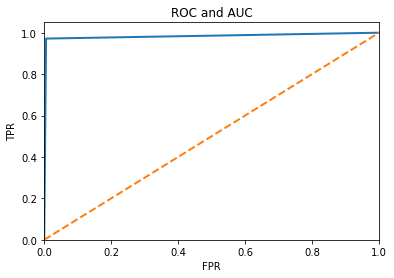

Test:
{'accuracy': 0.9649122807017544, 'precision': 0.9897959183673469, 'recall': 0.9150943396226415, 'f1': 0.9509803921568627, 'auc': 0.9547538737219352}
[[178   1]
 [  9  97]]


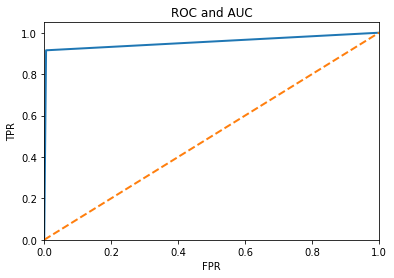

In [20]:
train_report_semi, test_report_semi = report_linearSVC(X_train, y_train, X_test, y_test, svc_clf)

* Monte Carlo Simulation

In [21]:
semi_supervised_train = {}
semi_supervised_test = {}
for m in range(30):
    X_train, X_test, y_train, y_test = train_test_split(wdbc_X, wdbc_y_b, test_size=0.5, random_state=m, stratify = wdbc_y)
    scaler = MinMaxScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    C = linearSVC_param_search(X_train, y_train)['C']
    svc_clf = LinearSVC(penalty="l1", C = 10, loss="squared_hinge", max_iter = 10000, dual=False, tol=1e-3)
    svc_clf.fit(X_train, y_train)
    n = len(X_test)
    X_test_tmp = copy.deepcopy(X_test)
    X_test_train = []
    y_test_train = []
    for i in range(n):
        y = svc_clf.decision_function(X_test_tmp)
        w_norm = np.linalg.norm(svc_clf.coef_)
        dist = y / w_norm
        pos_max = np.argmax(dist)
        neg_max = np.argmin(dist)
        if pos_max > -neg_max:
            X_test_train.append(X_test_tmp[pos_max])
            y_test_train.append(1)
        else:
            X_test_train.append(X_test_tmp[neg_max])
            y_test_train.append(0)
        svc_clf.fit(np.concatenate((X_test_train, X_train), axis=0), np.concatenate((y_test_train, y_train), axis=0))
    train_report_semi, test_report_semi = report_linearSVC(X_train, y_train, X_test, y_test, svc_clf, plot = False)
    for key in train_report_semi.keys():
        if key not in semi_supervised_train.keys():
            semi_supervised_train[key] = []
        semi_supervised_train[key].append(train_report_semi[key])
    for key in test_report_semi.keys():
        if key not in semi_supervised_test.keys():
            semi_supervised_test[key] = []
        semi_supervised_test[key].append(test_report_semi[key])

In [22]:
semi_supervised_train_result = {}
semi_supervised_test_result = {}
for key in semi_supervised_train.keys():
    semi_supervised_train_result[key] = np.mean(semi_supervised_train[key])
for key in semi_supervised_test.keys():
    semi_supervised_test_result[key] = np.mean(semi_supervised_test[key])
print('Train:', semi_supervised_train_result)
print('Test:', semi_supervised_test_result)

Train: {'accuracy': 0.9889671361502346, 'precision': 0.9948865339422518, 'recall': 0.9754716981132078, 'f1': 0.9850532473641728, 'auc': 0.9862377217157798}
Test: {'accuracy': 0.9660818713450293, 'precision': 0.962701417022343, 'recall': 0.9459119496855346, 'f1': 0.9539365066249111, 'auc': 0.9619690102245179}


##### iii. Unsupervised Learning: Run k-means algorithm on the whole training set. Ignore the labels of the data, and assume k = 2.

* A. Run the k-means algorithm multiple times. Make sure that you initialize the algoritm randomly. How do you make sure that the algorithm was not trapped in a local minimum?

In [23]:
from sklearn.cluster import KMeans
X_train, X_test, y_train, y_test = train_test_split(wdbc_X, wdbc_y_b, test_size=0.2, random_state=42, stratify = wdbc_y)
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
kmeans = KMeans(n_clusters=2, random_state = 42).fit(X_train)

* B. Compute the centers of the two clusters and find the closest 30 data points to each center. Read the true labels of those 30 data points and take a majority poll within them. The majority poll becomes the label predicted by k-means for the members of each cluster. Then compare the labels provided by k-means with the true labels of the training data and report the average accuracy, precision, recall, F1-score, and AUC over M runs, and ROC and the confusion matrix for one of the runs.

In [24]:
center0 = kmeans.cluster_centers_[0]
center1 = kmeans.cluster_centers_[1]

In [25]:
distance_to_0s = []
for x in X_train:
    distance_to_0 = np.sqrt(np.sum(np.power((x-center0),2)))
    distance_to_0s.append(distance_to_0)

In [26]:
distance_to_1s = []
for x in X_train:
    distance_to_1 = np.sqrt(np.sum(np.power((x-center1),2)))
    distance_to_1s.append(distance_to_1)

In [27]:
d0_sort = np.argsort(distance_to_0s)
d1_sort = np.argsort(distance_to_1s)

In [28]:
len(d0_sort)

455

In [29]:
counter_0 = []
for index in d0_sort[:30]:
    counter_0.append(y_train[index])
counter_1 = []
for index in d1_sort[:30]:
    counter_1.append(y_train[index])

In [30]:
from collections import Counter
Counter(counter_0).most_common(1)[0][0]

0

In [31]:
from collections import Counter
Counter(counter_1).most_common(1)[0][0]

1

cluster0: class 0  
cluster1: class 1

In [54]:
pred_result = kmeans.labels_

In [55]:
def report_clf(train_y, pred_train, plot = True):
    accuracy_train = accuracy_score(train_y, pred_train)
    precision_train = precision_score(train_y, pred_train)
    recall_train = recall_score(train_y, pred_train)
    f1_train = f1_score(train_y, pred_train)
    fpr, tpr, thresholds = roc_curve(train_y, pred_train)
    roc_auc_train = auc(fpr, tpr)
    confusion_matrix_train = confusion_matrix(train_y, pred_train)
    train_report = {
        'accuracy':accuracy_train,
        'precision':precision_train,
        'recall':recall_train,
        'f1':f1_train,
        'auc':roc_auc_train
    }
    if plot == True:
        print('Train:')
        print(train_report)
        print(confusion_matrix_train)
    if plot == True:
        plt.figure()
        lw = 2
        plt.plot(fpr, tpr, lw=lw)
        plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('FPR')
        plt.ylabel('TPR')
        plt.title('ROC and AUC')
        plt.show()
    
    return train_report

Train:
{'accuracy': 0.9164835164835164, 'precision': 0.9583333333333334, 'recall': 0.8117647058823529, 'f1': 0.8789808917197452, 'auc': 0.8953560371517029}
[[279   6]
 [ 32 138]]


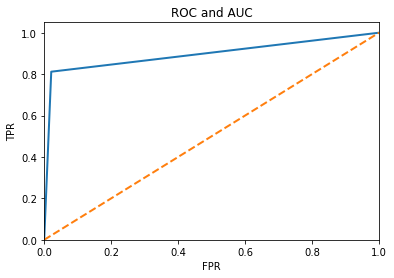

{'accuracy': 0.9164835164835164,
 'precision': 0.9583333333333334,
 'recall': 0.8117647058823529,
 'f1': 0.8789808917197452,
 'auc': 0.8953560371517029}

In [56]:
report_clf(y_train, pred_result)

* C. Classify test data based on their proximity to the centers of the clusters. Report the average accuracy, precision, recall, F1-score, and AUC over M runs, and ROC and the confusion matrix for one of the runs for the test data.

In [57]:
pred_test = kmeans.predict(X_test)

Train:
{'accuracy': 0.9473684210526315, 'precision': 0.9285714285714286, 'recall': 0.9285714285714286, 'f1': 0.9285714285714286, 'auc': 0.943452380952381}
[[69  3]
 [ 3 39]]


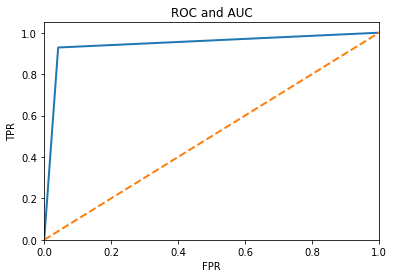

{'accuracy': 0.9473684210526315,
 'precision': 0.9285714285714286,
 'recall': 0.9285714285714286,
 'f1': 0.9285714285714286,
 'auc': 0.943452380952381}

In [58]:
report_clf(y_test, pred_test)

* Monte Carlo Simulation

In [59]:
unsupervised_train = {}
unsupervised_test = {}
for i in range(30):
    X_train, X_test, y_train, y_test = train_test_split(wdbc_X, wdbc_y_b, test_size=0.2, random_state=i, stratify = wdbc_y)
    scaler = MinMaxScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    kmeans = KMeans(n_clusters=2, random_state = i).fit(X_train)
    center0 = kmeans.cluster_centers_[0]
    center1 = kmeans.cluster_centers_[1]
    distance_to_0s = []
    for x in X_train:
        distance_to_0 = np.sqrt(np.sum(np.power((x-center0),2)))
        distance_to_0s.append(distance_to_0)
    distance_to_1s = []
    for x in X_train:
        distance_to_1 = np.sqrt(np.sum(np.power((x-center1),2)))
        distance_to_1s.append(distance_to_1)
    d0_sort = np.argsort(distance_to_0s)
    d1_sort = np.argsort(distance_to_1s)
    counter_0 = []
    for index in d0_sort[:30]:
        counter_0.append(y_train[index])
    counter_1 = []
    for index in d1_sort[:30]:
        counter_1.append(y_train[index])
    class_0 = Counter(counter_0).most_common(1)[0][0]
    class_1 = Counter(counter_1).most_common(1)[0][0]
    cluster_to_class = {0:class_0, 1:class_1}
    pred_result = []
    for label in kmeans.labels_:
        pred_result.append(cluster_to_class[label])
    train_report = report_clf(y_train, pred_result, plot = False)
    pred_test = []
    pred_test_raw = kmeans.predict(X_test)
    for label in pred_test_raw:
        pred_test.append(cluster_to_class[label])
    test_report = report_clf(y_test, pred_test, plot = False)
    for key in train_report.keys():
        if key not in unsupervised_train.keys():
            unsupervised_train[key] = []
        unsupervised_train[key].append(train_report[key])
    for key in test_report.keys():
        if key not in unsupervised_test.keys():
            unsupervised_test[key] = []
        unsupervised_test[key].append(test_report[key])

In [60]:
unsupervised_train_result = {}
unsupervised_test_result = {}
for key in unsupervised_train.keys():
    unsupervised_train_result[key] = np.mean(unsupervised_train[key])
for key in unsupervised_test.keys():
    unsupervised_test_result[key] = np.mean(unsupervised_test[key])
print('Train:', unsupervised_train_result)
print('Test:', unsupervised_test_result)

Train: {'accuracy': 0.9262271062271062, 'precision': 0.9518246367113614, 'recall': 0.8456862745098039, 'f1': 0.8954422227577598, 'auc': 0.9099776401788786}
Test: {'accuracy': 0.924561403508772, 'precision': 0.9410308109110548, 'recall': 0.8492063492063492, 'f1': 0.8918560413783794, 'auc': 0.9088624338624338}


##### iv. Spectral Clustering: Repeat 1(b)iii using spectral clustering, which is clustering based on kernels. Research what spectral clustering is. Use RBF kernel with gamma=1 or find a gamma for which the two clutsres have the same balance as the one in original data set (if the positive class has p and the negative class has n samples, the two clusters must have p and n members). Do not label data based on their proximity to cluster center, because spectral clustering may give you non-convex clusters . Instead, use fit − predict method.

In [72]:
from sklearn.cluster import SpectralClustering
spectral_clustering = SpectralClustering(n_clusters=2,affinity = 'rbf', gamma = 1, random_state=0).fit(X_train)

In [73]:
pred_train = spectral_clustering.labels_

In [74]:
counter_0 = []
counter_1 = []
for index, label in enumerate(spectral_clustering.labels_):
    if label == 0:
        counter_0.append(y_train[index])
    if label == 1:
        counter_1.append(y_train[index])

In [75]:
Counter(counter_0)

Counter({1: 77, 0: 284})

In [76]:
Counter(counter_1)

Counter({1: 93, 0: 1})

Cluster0 -> Class0; Cluster1 -> Class1

In [77]:
pred_train = pred_train 

In [78]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=1)
KNN.fit(X_train, pred_train)

KNeighborsClassifier(n_neighbors=1)

In [79]:
pred_test = KNN.predict(X_test)

In [80]:
pred_test

array([0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0], dtype=int32)

Train:
{'accuracy': 0.8285714285714286, 'precision': 0.9893617021276596, 'recall': 0.5470588235294118, 'f1': 0.7045454545454546, 'auc': 0.7717750257997936}
[[284   1]
 [ 77  93]]


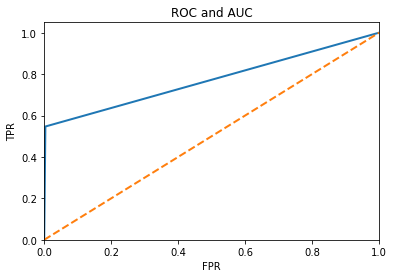

{'accuracy': 0.8285714285714286,
 'precision': 0.9893617021276596,
 'recall': 0.5470588235294118,
 'f1': 0.7045454545454546,
 'auc': 0.7717750257997936}

In [81]:
report_clf(y_train, pred_train)

Train:
{'accuracy': 0.8596491228070176, 'precision': 0.9642857142857143, 'recall': 0.6428571428571429, 'f1': 0.7714285714285715, 'auc': 0.814484126984127}
[[71  1]
 [15 27]]


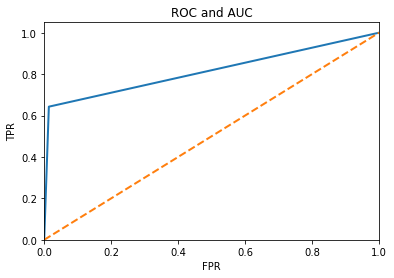

{'accuracy': 0.8596491228070176,
 'precision': 0.9642857142857143,
 'recall': 0.6428571428571429,
 'f1': 0.7714285714285715,
 'auc': 0.814484126984127}

In [82]:
report_clf(y_test, pred_test)

* Monte Carlo Simulation

In [83]:
spectral_clustering_train = {}
spectral_clustering_test = {}
for i in range(30):
    X_train, X_test, y_train, y_test = train_test_split(wdbc_X, wdbc_y_b, test_size=0.2, random_state=i, stratify = wdbc_y)
    scaler = MinMaxScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    spectral_clustering = SpectralClustering(n_clusters=2, affinity = 'rbf', gamma = 1, random_state=0).fit(X_train)
    pred_result = spectral_clustering.labels_
    counter_0 = []
    counter_1 = []
    for index, label in enumerate(spectral_clustering.labels_):
        if label == 0:
            counter_0.append(y_train[index])
        if label == 1:
            counter_1.append(y_train[index])
    class_0 = Counter(counter_0).most_common(1)[0][0]
    class_1 = Counter(counter_1).most_common(1)[0][0]
    cluster_to_class = {0:class_0, 1:class_1}
    pred_train = []
    for label in pred_result:
        pred_train.append(cluster_to_class[label])
    KNN = KNeighborsClassifier(n_neighbors=1)
    KNN.fit(X_train, pred_train)
    pred_test = KNN.predict(X_test)
    train_report = report_clf(y_train, pred_train, plot = False)
    test_report = report_clf(y_test, pred_test, plot = False)
    for key in train_report.keys():
        if key not in spectral_clustering_train.keys():
            spectral_clustering_train[key] = []
        spectral_clustering_train[key].append(train_report[key])
    for key in test_report.keys():
        if key not in spectral_clustering_test.keys():
            spectral_clustering_test[key] = []
        spectral_clustering_test[key].append(test_report[key])

In [84]:
spectral_train_result = {}
spectral_test_result = {}
for key in spectral_clustering_train.keys():
    spectral_train_result[key] = np.mean(spectral_clustering_train[key])
for key in spectral_clustering_test.keys():
    spectral_test_result[key] = np.mean(spectral_clustering_test[key])
print('Train:', spectral_train_result)
print('Test:', spectral_test_result)

Train: {'accuracy': 0.8625641025641025, 'precision': 0.980214448953919, 'recall': 0.6452941176470588, 'f1': 0.7771390188373937, 'auc': 0.8187289301685585}
Test: {'accuracy': 0.8654970760233918, 'precision': 0.9955231882315215, 'recall': 0.638095238095238, 'f1': 0.7745512023488176, 'auc': 0.818121693121693}


##### v. One can expect that supervised learning on the full data set works better than semi-supervised learning with half of the data set labeled.One can expect that unsupervised learning underperforms in such situations. Compare the results you obtained by those methods.

In [85]:
# Training
train_whole = {}
for key in supervised_train_result.keys():
    if key not in train_whole.keys():
        train_whole[key] = []
    train_whole[key].append(supervised_train_result[key])
for key in semi_supervised_train_result.keys():
    train_whole[key].append(semi_supervised_train_result[key])
for key in unsupervised_train_result.keys():
    train_whole[key].append(unsupervised_train_result[key])
for key in spectral_train_result.keys():
    train_whole[key].append(spectral_train_result[key])
pd.DataFrame.from_dict(train_whole, orient='index', columns = ['Supervised','Semi-Supervised','Unsupervised','Spectral Clustering'])

,Supervised,Semi-Supervised,Unsupervised,Spectral Clustering
accuracy,0.985788,0.988967,0.926227,0.862564
precision,0.990225,0.994887,0.951825,0.980214
recall,0.971569,0.975472,0.845686,0.645294
f1,0.980787,0.985053,0.895442,0.777139
auc,0.982919,0.986238,0.909978,0.818729


In [86]:
# Test
test_whole = {}
for key in supervised_test_result.keys():
    if key not in test_whole.keys():
        test_whole[key] = []
    test_whole[key].append(supervised_test_result[key])
for key in semi_supervised_test_result.keys():
    test_whole[key].append(semi_supervised_test_result[key])
for key in unsupervised_test_result.keys():
    test_whole[key].append(unsupervised_test_result[key])
for key in spectral_test_result.keys():
    test_whole[key].append(spectral_test_result[key])
pd.DataFrame.from_dict(test_whole, orient='index', columns = ['Supervised','Semi-Supervised','Unsupervised','Spectral Clustering'])

,Supervised,Semi-Supervised,Unsupervised,Spectral Clustering
accuracy,0.963158,0.966082,0.924561,0.865497
precision,0.969789,0.962701,0.941031,0.995523
recall,0.929365,0.945912,0.849206,0.638095
f1,0.948759,0.953937,0.891856,0.774551
auc,0.956118,0.961969,0.908862,0.818122


### 2. Active Learning Using Support Vector Machines  
#### (a) Download the banknote authentication Data Set from: https://archive.ics. uci.edu/ml/datasets/banknote+authentication. Choose 472 data points randomly as the test set, and the remaining 900 points as the training set. This is a binary classification problem.

In [183]:
booknote_data = pd.read_csv('../data/data_banknote_authentication.txt', sep=",", header=None)
booknote_X = booknote_data.iloc[:,:4]
booknote_y = booknote_data.iloc[:,4]

In [190]:
booknote_X_train, booknote_X_test, booknote_y_train, booknote_y_test = train_test_split(booknote_X, booknote_y, test_size=0.344, random_state=42)

#### (b) Repeat each of the following two procedures 50 times. You will have 50 errors for 90 SVMs per each procedure.  
##### i. Train a SVM with a pool of 10 randomly selected data points from the training set using linear kernel and L1 penalty. Select the penalty parameter using 5-fold cross validation. Repeat this process by adding 10 other randomly selected data points to the pool, until you use all the 900 points. Do NOT replace the samples back into the training set at each step. Calculate the test error for each SVM. You will have 90 SVMs that were trained using 10, 20, 30, ... , 900 data points and their 90 test errors. You have implemented passive learning.

In [212]:
import random
num_list = list(np.arange(900))
random_data_X = []
random_data_y = []
for i in range(90):
    new_data_list = []
    new_data_y = []
    for j in range(10):
        new_dp = random.choice(num_list)
        num_list.remove(new_dp)
        new_data_list.append(list(booknote_X_train.iloc[new_dp]))
        new_data_y.append(booknote_y_train.iloc[new_dp])
    random_data_X.append(new_data_list)
    random_data_y.append(new_data_y)

In [216]:
train_X_tmp = []
train_y_tmp = []
for i in range(90):
    train_X_tmp += random_data_X[i]
    train_y_tmp += random_data_y[i]
    svm_params = linearSVC_param_search(train_X_tmp, train_y_tmp)
    C = svm_params['C']
    svc_clf = LinearSVC(penalty="l1", C = C, loss="squared_hinge", max_iter = 10000, dual=False, tol=1e-3)
    svc_clf.fit(train_X_tmp, train_y_tmp)
    pred_test = svc_clf.predict(booknote_X_test)
    print(i, 'test error:', 1-accuracy_score(booknote_y_test, pred_test))

0 test error: 0.14830508474576276
1 test error: 0.1228813559322034
2 test error: 0.03813559322033899
3 test error: 0.01906779661016944
4 test error: 0.01906779661016944
5 test error: 0.014830508474576232
6 test error: 0.014830508474576232
7 test error: 0.014830508474576232
8 test error: 0.014830508474576232
9 test error: 0.016949152542372836
10 test error: 0.016949152542372836
11 test error: 0.016949152542372836
12 test error: 0.008474576271186418
13 test error: 0.008474576271186418
14 test error: 0.008474576271186418
15 test error: 0.008474576271186418
16 test error: 0.008474576271186418
17 test error: 0.010593220338983023
18 test error: 0.010593220338983023
19 test error: 0.010593220338983023
20 test error: 0.010593220338983023
21 test error: 0.010593220338983023
22 test error: 0.010593220338983023
23 test error: 0.010593220338983023
24 test error: 0.012711864406779627
25 test error: 0.010593220338983023
26 test error: 0.012711864406779627
27 test error: 0.012711864406779627
28 test 

##### ii. Train a SVM with a pool of 10 randomly selected data points from the training set using linear kernel and L1 penalty. Select the parameters of the SVM with 5-fold cross validation. Choose the 10 closest data points in the training set to the hyperplane of the SVM and add them to the pool. Do not replace the samples back into the training set. Train a new SVM using the pool. Repeat this process until all training data is used. You will have 90 SVMs that were trained using 10, 20, 30,..., 900 data points and their 90 test errors. You have implemented active learning.

In [255]:
import warnings
warnings.filterwarnings("ignore")
train_X_tmp = []
train_y_tmp = []
num_list = list(np.arange(900))
train_X_left = copy.deepcopy(booknote_X_train).values.tolist()
train_y_left = list(copy.deepcopy(booknote_y_train))
for i in range(90):
    if i == 0:
        for j in range(10):
            new_dp = random.choice(num_list)
            new_dp_index = num_list.index(new_dp)
            num_list.remove(new_dp)
            train_X_tmp.append(list(booknote_X_train.iloc[new_dp]))
            train_y_tmp.append(booknote_y_train.iloc[new_dp])
            train_X_left.pop(new_dp_index)
            train_y_left.pop(new_dp_index)
    else:
        # choose closest data points
        y = svc_clf.decision_function(train_X_left)
        w_norm = np.linalg.norm(svc_clf.coef_)
        dist = list(abs(y / w_norm))
        for count in range(10):
            # index
            new_dp_index = np.argmin(dist)
            new_dp = num_list[new_dp_index]
            num_list.pop(new_dp_index)
            train_X_tmp.append(list(booknote_X_train.iloc[new_dp]))
            train_y_tmp.append(booknote_y_train.iloc[new_dp])
            train_X_left.pop(new_dp_index)
            dist.pop(new_dp_index)
                
    svm_params = linearSVC_param_search(train_X_tmp, train_y_tmp)
    C = svm_params['C']
    svc_clf = LinearSVC(penalty="l1", C = C, loss="squared_hinge", max_iter = 10000, dual=False, tol=1e-3)
    svc_clf.fit(train_X_tmp, train_y_tmp)
    pred_test = svc_clf.predict(booknote_X_test)
    print(i, 'test error:', 1-accuracy_score(booknote_y_test, pred_test))

0 test error: 0.1228813559322034
1 test error: 0.09533898305084743
2 test error: 0.05720338983050843
3 test error: 0.010593220338983023
4 test error: 0.008474576271186418
5 test error: 0.012711864406779627
6 test error: 0.010593220338983023
7 test error: 0.010593220338983023
8 test error: 0.010593220338983023
9 test error: 0.010593220338983023
10 test error: 0.010593220338983023
11 test error: 0.010593220338983023
12 test error: 0.010593220338983023
13 test error: 0.010593220338983023
14 test error: 0.010593220338983023
15 test error: 0.010593220338983023
16 test error: 0.010593220338983023
17 test error: 0.010593220338983023
18 test error: 0.010593220338983023
19 test error: 0.010593220338983023
20 test error: 0.010593220338983023
21 test error: 0.010593220338983023
22 test error: 0.010593220338983023
23 test error: 0.010593220338983023
24 test error: 0.010593220338983023
25 test error: 0.010593220338983023
26 test error: 0.010593220338983023
27 test error: 0.010593220338983023
28 tes

* Monte Carlo Simulation  
Average the 50 test errors for each of the incrementally trained 90 SVMs in 2(b)i and 2(b)ii. By doing so, you are performing a Monte Carlo simulation. Plot average test error versus number of training instances for both active and passive learners on the same figure and report your conclusions. Here, you are actually obtaining a learning curve by Monte-Carlo simulation.

In [293]:
passive_error_list = []
active_error_list = []
from tqdm import tqdm
for m in tqdm(range(50)):
    booknote_X_train, booknote_X_test, booknote_y_train, booknote_y_test = train_test_split(booknote_X, booknote_y, test_size=0.344, random_state=m)
    num_list = list(np.arange(900))
    random_data_X = []
    random_data_y = []
    for i in range(90):
        new_data_list = []
        new_data_y = []
        for j in range(10):
            new_dp = random.choice(num_list)
            num_list.remove(new_dp)
            new_data_list.append(list(booknote_X_train.iloc[new_dp]))
            new_data_y.append(booknote_y_train.iloc[new_dp])
        random_data_X.append(new_data_list)
        random_data_y.append(new_data_y)
    train_X_tmp = []
    train_y_tmp = []
    passive_errors = []
    for i in range(90):
        train_X_tmp += random_data_X[i]
        train_y_tmp += random_data_y[i]
        svm_params = linearSVC_param_search(train_X_tmp, train_y_tmp)
        C = svm_params['C']
        svc_clf = LinearSVC(penalty="l1", C = C, loss="squared_hinge", max_iter = 10000, dual=False, tol=1e-3)
        svc_clf.fit(train_X_tmp, train_y_tmp)
        pred_test = svc_clf.predict(booknote_X_test)
        passive_errors.append(1-accuracy_score(booknote_y_test, pred_test))
    passive_error_list.append(passive_errors)
    train_X_tmp = []
    train_y_tmp = []
    num_list = list(np.arange(900))
    train_X_left = copy.deepcopy(booknote_X_train).values.tolist()
    train_y_left = list(copy.deepcopy(booknote_y_train))
    active_errors = []
    for i in range(90):
        if i == 0:
            for j in range(10):
                new_dp = random.choice(num_list)
                new_dp_index = num_list.index(new_dp)
                num_list.remove(new_dp)
                train_X_tmp.append(list(booknote_X_train.iloc[new_dp]))
                train_y_tmp.append(booknote_y_train.iloc[new_dp])
                train_X_left.pop(new_dp_index)
                train_y_left.pop(new_dp_index)
        else:
            # choose closest data points
            y = svc_clf.decision_function(train_X_left)
            w_norm = np.linalg.norm(svc_clf.coef_)
            dist = list(abs(y / w_norm))
            for count in range(10):
                # index
                new_dp_index = np.argmin(dist)
                new_dp = num_list[new_dp_index]
                num_list.pop(new_dp_index)
                train_X_tmp.append(list(booknote_X_train.iloc[new_dp]))
                train_y_tmp.append(booknote_y_train.iloc[new_dp])
                train_X_left.pop(new_dp_index)
                dist.pop(new_dp_index)
                
        svm_params = linearSVC_param_search(train_X_tmp, train_y_tmp)
        C = svm_params['C']
        svc_clf = LinearSVC(penalty="l1", C = C, loss="squared_hinge", max_iter = 10000, dual=False, tol=1e-3)
        svc_clf.fit(train_X_tmp, train_y_tmp)
        pred_test = svc_clf.predict(booknote_X_test)
        active_errors.append(1-accuracy_score(booknote_y_test, pred_test))
    active_error_list.append(active_errors)

100%|██████████| 50/50 [18:23<00:00, 22.06s/it]


In [303]:
y1 = np.mean(passive_error_list,axis = 0)
y2 = np.mean(active_error_list,axis = 0)
x = np.arange(10,910,10)

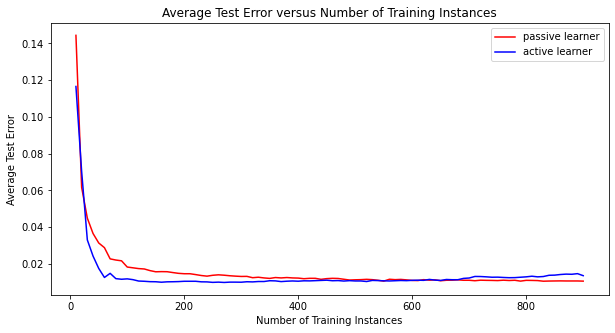

In [309]:
plt.figure(figsize=(10,5))
plt.plot(x,y1,'r-',label="passive learner")
plt.plot(x,y2,'b-',label="active learner")
plt.title("Average Test Error versus Number of Training Instances")
plt.xlabel("Number of Training Instances")
plt.ylabel("Average Test Error")
plt.legend()

The conclusion is that active learner can achieve low error rate with fewer training instances. Based on active learner, a model can achieve good performance even though it is trained on a small labeled dataset.